# Traffic Accidents in Denver - Incident Analysis & Report

Authored by: Katie Chen and Zachary Francis  
GitHub: https://github.com/zjfrancis/data_science_tools

## Part I. Problem Statement - Dataset & Motivation
Denver's Open Data Catalogue keeps an open record of traffic accidents from the past few years in their [Open Data Catalogue](https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-traffic-accidents).  This data set can be used to possibly answer several inquiries:
- Are traffic accidents in Denver on an upward or downward trend?
- Are serious injuries or fatalites changing in any significant way?
- Are fatalaties or injuries more likely when a certain type of vehicle is at fault? Is the struck vehicle?

The data set can be accessed by downloading a CSV or calling against the REST API.  Ultimately it is a large file of comma separated values, with 48 columnns.  Not all the columns will be of use - there is especially a lot of location/spatial data that will probably not be prudent to the goals of this data analysis.  The CSV file has been downloaded and is included in the git repository of this notebook.  To make comparisons with traffic data from other cities, similar data sets will need to downloaded (or to save on reposity space - access through a web api via a `curl` call).  Comparing this data set against [Denver Traffic Counts](https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-traffic-counts) might also be useful to normalize the data against traffic density.  

In [2]:
# Can take 2+ minutes to download when the curl is executed
#!curl -o traffic_accidents.csv https://www.denvergov.org/media/gis/DataCatalog/traffic_accidents/csv/traffic_accidents.csv
#!head -n1 traffic_accidents.csv | tr ',' '\n' | nl

Some columns of interest will be the date, geospatial data if a an assessment is to be made on what driving locations or the most dangerous in Denver, the road description, the vehicle types, fatalities, and injuries.  Many of the records show signs of being hand entered, and there are cases of missing data.

In [3]:
import pandas as pd
import numpy as np

traffic_data = pd.read_csv('traffic_accidents.csv')
traffic_data.head()

/var/folders/yv/p2v9r64s18x1j30cgyrnj6sh0000gr/T/ipykernel_60298/1765151946.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv('traffic_accidents.csv')


,shape,object_id,incident_id,offense_id,offense_code,offense_code_extension,top_traffic_accident_offense,first_occurrence_date,last_occurrence_date,reported_date,...,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2,POINT_X,POINT_Y
0,<geoprocessing describe geometry object object...,49728,2023202134,202320213454410,5441,0,TRAF - ACCIDENT,2023-04-19 10:53:00,2023-04-19 10:53:00,2023-04-19 10:53:00,...,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,<geoprocessing describe geometry object object...,49729,2023202140,202320214054410,5441,0,TRAF - ACCIDENT,2023-04-19 11:00:00,2023-04-19 11:00:00,2023-04-19 11:22:00,...,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,<geoprocessing describe geometry object object...,47271,2023165493,202316549354010,5401,0,TRAF - ACCIDENT - HIT & RUN,2023-03-31 09:45:00,2023-03-31 09:45:00,2023-03-31 09:45:00,...,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,<geoprocessing describe geometry object object...,47272,2023166295,202316629554410,5441,0,TRAF - ACCIDENT,2023-03-31 16:54:00.000001,2023-03-31 16:54:00.000001,2023-03-31 16:54:00.000001,...,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,<geoprocessing describe geometry object object...,47273,2023166532,202316653254010,5401,0,TRAF - ACCIDENT - HIT & RUN,2023-03-31 19:25:00.000001,2023-03-31 19:25:00.000001,2023-04-03 21:03:00,...,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


There are 48 columns:
1. __SHAPE:__ Not described in the metadata
1. __OBJECTID_1:__ Record identification number used in this dataset
1. __INCIDENT_ID:__ Official record identification number assigned by the Denver Police Department
1. __OFFENSE_ID:__ Concatenation of INCIDENT_ID, OFFENSE_CODE, and OFFENSE_CODE_EXTENSION
1. __OFFENSE_CODE:__ Code indicating the type of offense
1. __OFFENSE_CODE_EXTENSION:__ Code indicating the offense subtype, if applicable
1. __TOP_TRAFFIC_ACCIDENT_OFFENSE:__ The most significant motor vehicle accident offense associated with the crash: FATAL, SBI, HIT & RUN, DUI, POLICE, ACCIDENT
1. __FIRST_OCCURRENCE_DATE:__ Earliest potential date and time of reported crash (In some cases, like a hit and run crash involving a parked vehicle, the reporting vehicle owner may not know the exact time of occurrence.)
1. __LAST_OCCURRENCE_DATE:__ Latest potential date and time of reported crash (In some cases, like a hit and run crash involving a parked vehicle, the reporting vehicle owner may not know the exact time of occurrence.)
1. __REPORTED_DATE:__ Date and time the crash was reported to DPD
1. __INCIDENT_ADDRESS:__ Approximate location of the incident
1. __GEO_X:__ Approximate horizontal location (east-west) of crash defined in the NAD 1983 State Plane feet Colorado Central FIPS 0502 projected coordinate system
1. __GEO_Y:__ Approximate vertical location (north-south) of crash defined in the NAD 1983 State Plane feet Colorado Central FIPS 0502 projected coordinate system
1. __GEO_LON:__ Approximate horizontal location (east-west) of crash defined in WGS 1984 geographic coordinate system
1. __GEO_LAT:__ Approximate vertical location (north-south) of crash defined in WGS 1984 geographic coordinate system
1. __DISTRICT_ID:__ Denver Police District where the crash occurred
1. __PRECINCT_ID:__	Denver Police Precinct where the crash occurred
1. __NEIGHBORHOOD_ID:__	Neighborhood where the crash occurred
1. __BICYCLE_IND:__ Indicates how many people riding bicycles were involved with the crash
1. __PEDESTRIAN_IND:__ Indicates how many pedestrians were involved with the crash
1. __HARMFUL_EVENT_SEQ_1:__ Indicates the first occurring harmful event in the crash
1. __HARMFUL_EVENT_SEQ_2:__ Indicates the second occurring harmful event in the crash
1. __HARMFUL_EVENT_SEQ_3:__ Indicates the most harmful event in the crash
1. __ROAD_LOCATION:__ Describes the specific location of the crash in relation to the roadway or if on private property
1. __ROAD_DESCRIPTION:__ Describes the specific location of the crash in relation to intersections, alleys, driveways, highway interchanges, and parking lots
1. __ROAD_CONTOUR:__ Describes the specific location of the crash relating to horizonal and vertical curves at the location of the first harmful event
1. __ROAD_CONDITION:__ Describes the roadway conditions at the time and location of the crash
1. __LIGHT_CONDITION:__ Describes the roadway lighting conditions at the time and location of the crash
1. __TU1_VEHICLE_TYPE:__ Indicates the vehicle type of traffic unit 1
1. __TU1_TRAVEL_DIRECTION:__ Indicates the vehicle direction prior to impact of traffic unit 1
1. __TU1_VEHICLE_MOVEMENT:__ Indicates the vehicle movement prior to impact of traffic unit 1
1. __TU1_DRIVER_ACTION:__ Indicates any action contibuting to the crash by the driver of traffic unit 1, when applicable
1. __TU1_DRIVER_HUMANCONTRIBFACTOR:__ Indicates any additional contributing factor to the crash by the driver of traffic unit 1, when applicable
1. __TU1_PEDESTRIAN_ACTION:__ Indicates any action contibuting to the crash by a pedestrian traffic unit 1, when applicable
1. __TU2_VEHICLE_TYPE:__ Indicates the vehicle type of traffic unit 2
1. __TU2_TRAVEL_DIRECTION:__ Indicates the vehicle direction prior to impact of traffic unit 2
1. __TU2_VEHICLE_MOVEMENT:__ Indicates the vehicle movement prior to impact of traffic unit 2
1. __TU2_DRIVER_ACTION:__ Indicates any action contibuting to the crash by the driver of traffic unit 2, when applicable
1. __TU2_DRIVER_HUMANCONTRIBFACTOR:__ Indicates any additional contributing factor to the crash by the driver of traffic unit 2, when applicable
1. __TU2_PEDESTRIAN_ACTION:__ Indicates any action contibuting to the crash by a pedestrian traffic unit 2, when applicable
1. __SERIOUSLY_INJURED:__ Indicates the number of people who were seriously injured as a result of the crash
1. __FATALITIES:__ Indicates the number of people who were fatally injured as a result of the crash
1. __FATALITY_MODE_1:__ Indicates the mode (means of travel) of a person fatally injured as a result of the crash, not related to traffic unit number
1. __FATALITY_MODE_2:__ Indicates the mode (means of travel) of a second person fatally injured as a result of the crash, not related to traffic unit number
1. __SERIOUSLY_INJURED_MODE_1:__ Indicates the mode (means of travel) of a person seriously injured as a result of the crash, not related to traffic unit number
1. __SERIOUSLY_INJURED_MODE_2:__ Indicates the mode (means of travel) of a second person seriously injured as a result of the crash, not related to traffic unit number
1. __POINT_X:__ Not described in the metadata
1. __POINT_Y:__ Not described in the metadata

### Part II. Literary Analysis

Previous works primarily focus on road conditions, time of day, location, and various human factors that contribute to traffic accidents, e.g. dry/icy roads, intersection vs. non intersection, driver action, etc. We know from these studies that the human factor causing the overwhelming majority of traffic accidents include aggressive/reckless driving, distracted driving, and inexperience. Injuries and fatalities from traffic accidents are least common on weekdays between midnight-5am, but spike on weekends including Fridays at around 2:30am. We also know that fatalities and injuries tend to occur around street non-intersections and intersections, with I-70 and Peoria Street being the most dangerous locations to date.

Our work differs from these analyses by focusing primarily on the vehicle types and details of mode of transport of the recorded incident. What types of vehicles cause the most injuries/fatalities? Are injuries and fatalities more likely when a certain type of vehicle is at fault? Our analysis digs deeper into the relationships between the different types of vehicles and modes of transport between a driver being hit and the driver at fault.

** See other works here:
- https://medium.com/denvertraffic/traffic-accident-analysis-and-predictive-indicators-in-denver-colorado-cbf3fd1bad00
- https://github.com/johnherr/Traffic-Accidents-in-Denver

### Part III. Data Cleaning & Type Conversion

This section covers all of the data cleaning and feature engineering we applied to the data set.  Firstly, this data set contains a large number of attributes, so we drop several columns from the data set that will not be relevant in the context of the research questions we want to explore.   The primary focus for this analysis is on fatalities, injuries, and vehicle types, so erroneous columns can be dropped from the data set.

In [4]:
# Dropping ambiguous columns that aren't of clear utility
to_drop = ["shape","object_id","incident_id", "offense_id", "POINT_X", "POINT_Y",
           "first_occurrence_date", "last_occurrence_date"]
traffic_data = traffic_data.drop(to_drop, axis=1)

# Dropping columns that could be useful but aren't relevant to our research questions
to_drop = ['incident_address','geo_x','geo_y','geo_lon','geo_lat','district_id','precinct_id',
           'neighborhood_id','road_location','ROAD_CONTOUR','ROAD_CONDITION','LIGHT_CONDITION',
           'HARMFUL_EVENT_SEQ_1','HARMFUL_EVENT_SEQ_2']
traffic_data = traffic_data.drop(to_drop, axis=1)

There is an opportunity for feature engineering the first three columns: they can consolidated into a column called offense, using the last word in `top_traffic_accident_offense` to describe the offense associated with the accident.

In [5]:
traffic_data.top_traffic_accident_offense.value_counts()

top_traffic_accident_offense
TRAF - ACCIDENT                   152423
TRAF - ACCIDENT - HIT & RUN        65666
TRAF - ACCIDENT - DUI/DUID          6297
TRAF - ACCIDENT - SBI               3476
TRAF - ACCIDENT - POLICE            2193
TRAF - ACCIDENT - FATAL              611
Name: count, dtype: int64

In [6]:
traffic_data['OFFENSE'] = traffic_data.top_traffic_accident_offense.str.extract(r'- ([A-Z &/]+)\s*$')
traffic_data.OFFENSE.value_counts() # Ensure the counts match counts above

OFFENSE
ACCIDENT                   152423
HIT & RUN                   65666
DUI/DUID                     6297
SBI                          3476
POLICE                       2193
FATAL                         611
Name: count, dtype: int64

In [7]:
# Drop the uneeded columns
traffic_data = traffic_data.drop(['offense_code','offense_code_extension','top_traffic_accident_offense'], axis=1)

Another opportunity for feature engineering is to encode `reported_date` into a Datetime object.  The values of `reported_date` are inconsistent, so we cannot use a rigid `strftime` for the datetime conversion.  Luckily, the `to_datetime` method in pandas can automatically convert a string into a datetime as long as it conforms to any ISO8601 formatted string.

In [8]:
traffic_data['DATETIME'] = pd.to_datetime(traffic_data.reported_date, format='ISO8601')
traffic_data[['reported_date','DATETIME']]  # Confirm the dates look coded correctly

,reported_date,DATETIME
0,2023-04-19 10:53:00,2023-04-19 10:53:00.000000
1,2023-04-19 11:22:00,2023-04-19 11:22:00.000000
2,2023-03-31 09:45:00,2023-03-31 09:45:00.000000
3,2023-03-31 16:54:00.000001,2023-03-31 16:54:00.000001
4,2023-04-03 21:03:00,2023-04-03 21:03:00.000000
...,...,...
230661,2022-08-15 10:05:00,2022-08-15 10:05:00.000000
230662,2022-07-14 17:08:00,2022-07-14 17:08:00.000000
230663,2022-07-14 22:05:00,2022-07-14 22:05:00.000000
230664,2022-07-15 12:22:00,2022-07-15 12:22:00.000000


In [9]:
# Drop reported_date
traffic_data = traffic_data.drop('reported_date', axis=1)

The following line renames the Bicycle and Pedestrian indicator columns to be consistent with the remaining column names:

In [10]:
traffic_data.rename(columns={'bicycle_ind':'BICYCLE_NUM', 'pedestrian_ind':'PEDESTRIAN_NUM'}, inplace=True)

The next code block reorders the columns so that `DATETIME` appears first, then the rows are sorted by datetime since we will be conducting time series analyses.  The column values were extracted using `traffic_data.columns.values`.  The ordering of the `DATETIME` also reveals the earliest and latest dates in the data set to be January 1, 2013 and May 21, 2023, which means new entries are still being added to the data set.

In [11]:
traffic_data = traffic_data[['DATETIME', 'OFFENSE', 'BICYCLE_NUM', 'PEDESTRIAN_NUM',
       'HARMFUL_EVENT_SEQ_MOST', 'ROAD_DESCRIPTION', 'TU1_VEHICLE_TYPE',
       'TU1_TRAVEL_DIRECTION', 'TU1_VEHICLE_MOVEMENT',
       'TU1_DRIVER_ACTION', 'TU1_DRIVER_HUMANCONTRIBFACTOR',
       'TU1_PEDESTRIAN_ACTION', 'TU2_VEHICLE_TYPE',
       'TU2_TRAVEL_DIRECTION', 'TU2_VEHICLE_MOVEMENT',
       'TU2_DRIVER_ACTION', 'TU2_DRIVER_HUMANCONTRIBFACTOR',
       'TU2_PEDESTRIAN_ACTION', 'SERIOUSLY_INJURED', 'FATALITIES',
       'FATALITY_MODE_1', 'FATALITY_MODE_2', 'SERIOUSLY_INJURED_MODE_1',
       'SERIOUSLY_INJURED_MODE_2']].sort_values('DATETIME')
traffic_data

,DATETIME,OFFENSE,BICYCLE_NUM,PEDESTRIAN_NUM,HARMFUL_EVENT_SEQ_MOST,ROAD_DESCRIPTION,TU1_VEHICLE_TYPE,TU1_TRAVEL_DIRECTION,TU1_VEHICLE_MOVEMENT,TU1_DRIVER_ACTION,...,TU2_VEHICLE_MOVEMENT,TU2_DRIVER_ACTION,TU2_DRIVER_HUMANCONTRIBFACTOR,TU2_PEDESTRIAN_ACTION,SERIOUSLY_INJURED,FATALITIES,FATALITY_MODE_1,FATALITY_MODE_2,SERIOUSLY_INJURED_MODE_1,SERIOUSLY_INJURED_MODE_2
149003,2013-01-01 00:19:00.000000,ACCIDENT,0.0,0.0,GUARD RAIL,NON INTERSECTION,PASSENGER CAR/VAN,EAST,GOING STRAIGHT,CARELESS DRIVING,...,,,,,0.0,0.0,,,,
150740,2013-01-01 00:32:00.000000,ACCIDENT,0.0,0.0,FRONT TO SIDE WITH MV IN TRANSPORT,AT INTERSECTION,SUV,NORTH,MAKING LEFT TURN,FAILED TO YIELD ROW,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,
158043,2013-01-01 00:33:00.000000,HIT & RUN,0.0,0.0,FRONT TO SIDE WITH MV IN TRANSPORT,AT INTERSECTION,PASSENGER CAR/VAN,EAST,MAKING U-TURN,FAILED TO YIELD ROW,...,GOING STRAIGHT,OTHER,NO APPARENT,OTHER,0.0,0.0,,,,
141921,2013-01-01 00:45:00.000000,ACCIDENT,0.0,0.0,FRONT TO SIDE WITH MV IN TRANSPORT,AT INTERSECTION,SUV,EAST,GOING STRAIGHT,DISREGARDED OTHER DEVICE,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,
150456,2013-01-01 01:03:00.000000,ACCIDENT,0.0,1.0,PEDESTRIAN-OTHER,NON INTERSECTION,,WEST,,,...,GOING STRAIGHT,OTHER,NO APPARENT,,0.0,0.0,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24037,2023-05-21 15:13:00.000000,ACCIDENT,0.0,0.0,Front to Side,Driveway Access Related,Passenger Car/Passenger Van,West,Making Right Turn,Failed to Yield ROW,...,Making Left Turn,NaN,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN
24039,2023-05-21 15:40:00.000001,ACCIDENT,0.0,0.0,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,...,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,NaN,NaN,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION
24041,2023-05-21 15:59:00.000000,ACCIDENT,0.0,0.0,Front to Rear,Non-Intersection,Motorcycle,South,Going Straight,Followed Too Closely,...,Going Straight,No Contributing Action,No Apparent Contributing Factor,NaN,0.0,0.0,NaN,NaN,NaN,NaN
24040,2023-05-21 16:23:00.000000,ACCIDENT,0.0,0.0,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,...,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,NaN,NaN,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION,UNDER INVESTIGATION


The following line sums the null values in each column:

In [12]:
traffic_data.isnull().sum()

DATETIME                             0
OFFENSE                              0
BICYCLE_NUM                       5023
PEDESTRIAN_NUM                    5023
HARMFUL_EVENT_SEQ_MOST            1369
ROAD_DESCRIPTION                   174
TU1_VEHICLE_TYPE                  2342
TU1_TRAVEL_DIRECTION              3211
TU1_VEHICLE_MOVEMENT              3320
TU1_DRIVER_ACTION                 4345
TU1_DRIVER_HUMANCONTRIBFACTOR     5584
TU1_PEDESTRIAN_ACTION            27464
TU2_VEHICLE_TYPE                  3627
TU2_TRAVEL_DIRECTION              4479
TU2_VEHICLE_MOVEMENT              3826
TU2_DRIVER_ACTION                 5677
TU2_DRIVER_HUMANCONTRIBFACTOR     5586
TU2_PEDESTRIAN_ACTION            27186
SERIOUSLY_INJURED                  830
FATALITIES                         830
FATALITY_MODE_1                  27722
FATALITY_MODE_2                  27778
SERIOUSLY_INJURED_MODE_1         27246
SERIOUSLY_INJURED_MODE_2         27723
dtype: int64

There are quite a lot of null values for `FATALITY_MODE`, `SERIOUSLY_INJURED_MODE`, and `PEDESTRIAN_ACTION`.  Let's check how these null values are distributed across the years in the data set:

In [13]:
print(traffic_data.isnull().groupby(traffic_data.DATETIME.dt.year).sum()[['TU1_PEDESTRIAN_ACTION','SERIOUSLY_INJURED_MODE_1','FATALITY_MODE_1']])


          TU1_PEDESTRIAN_ACTION  SERIOUSLY_INJURED_MODE_1  FATALITY_MODE_1
DATETIME                                                                  
2013                          0                         0                0
2014                          0                         0                0
2015                          0                         0                0
2016                          1                         0                0
2017                          2                         0                0
2018                          0                         0                0
2019                          0                         0                0
2020                          0                         0                0
2021                       4176                      4169             4215
2022                      16927                     16769            17093
2023                       6358                      6308             6414


All of these null values only appear within the last three years, so dropping them from the data set could seriously skew any time series analysis.  These values can be recoded to another value to represent that how accidents were recorded must have changed sometime in 2021.  However, null values for `FATALITIES` and `SERIOUSLY_INJURED` cannot be worked around since these attributes are crucial to our analysis.  There are a relatively low number of null values for these columns, so these can be safely dropped from the data.  The same can be done with the other float columns for `BICYCLE_NUM` and `PEDESTRIAN_NUM`.

In [14]:
print("Percentage of the total data affected by null values:")
print(traffic_data[['BICYCLE_NUM','PEDESTRIAN_NUM','SERIOUSLY_INJURED','FATALITIES']].isnull().sum() * 100 / len(traffic_data))

Percentage of the total data affected by null values:
BICYCLE_NUM          2.177607
PEDESTRIAN_NUM       2.177607
SERIOUSLY_INJURED    0.359828
FATALITIES           0.359828
dtype: float64


In [15]:
traffic_data.dropna(subset=['BICYCLE_NUM','PEDESTRIAN_NUM','SERIOUSLY_INJURED','FATALITIES'], inplace=True)
traffic_data.isnull().sum()

DATETIME                             0
OFFENSE                              0
BICYCLE_NUM                          0
PEDESTRIAN_NUM                       0
HARMFUL_EVENT_SEQ_MOST            1369
ROAD_DESCRIPTION                   174
TU1_VEHICLE_TYPE                  2342
TU1_TRAVEL_DIRECTION              3211
TU1_VEHICLE_MOVEMENT              3320
TU1_DRIVER_ACTION                 4345
TU1_DRIVER_HUMANCONTRIBFACTOR     5584
TU1_PEDESTRIAN_ACTION            27464
TU2_VEHICLE_TYPE                  3627
TU2_TRAVEL_DIRECTION              4479
TU2_VEHICLE_MOVEMENT              3826
TU2_DRIVER_ACTION                 5677
TU2_DRIVER_HUMANCONTRIBFACTOR     5586
TU2_PEDESTRIAN_ACTION            27186
SERIOUSLY_INJURED                    0
FATALITIES                           0
FATALITY_MODE_1                  27722
FATALITY_MODE_2                  27778
SERIOUSLY_INJURED_MODE_1         27246
SERIOUSLY_INJURED_MODE_2         27723
dtype: int64

The rest of the null values, especially since these are string objects, can be filled in with `UNKNOWN`:

In [16]:
traffic_data.fillna('UNKNOWN', inplace=True)
traffic_data.isnull().sum()

DATETIME                         0
OFFENSE                          0
BICYCLE_NUM                      0
PEDESTRIAN_NUM                   0
HARMFUL_EVENT_SEQ_MOST           0
ROAD_DESCRIPTION                 0
TU1_VEHICLE_TYPE                 0
TU1_TRAVEL_DIRECTION             0
TU1_VEHICLE_MOVEMENT             0
TU1_DRIVER_ACTION                0
TU1_DRIVER_HUMANCONTRIBFACTOR    0
TU1_PEDESTRIAN_ACTION            0
TU2_VEHICLE_TYPE                 0
TU2_TRAVEL_DIRECTION             0
TU2_VEHICLE_MOVEMENT             0
TU2_DRIVER_ACTION                0
TU2_DRIVER_HUMANCONTRIBFACTOR    0
TU2_PEDESTRIAN_ACTION            0
SERIOUSLY_INJURED                0
FATALITIES                       0
FATALITY_MODE_1                  0
FATALITY_MODE_2                  0
SERIOUSLY_INJURED_MODE_1         0
SERIOUSLY_INJURED_MODE_2         0
dtype: int64

The columns `TU1_VEHICLE_TYPE`, `TU2_VEHICLE_TYPE`, `FATALITY_MODE_1`, `FATALITIY_MODE_2`, `SERIOUSLY_INJURED_MODE_1`, and `SERIOUSLY_INJURED_MODE_2` have inconsistent entries and are ripe for cleaning.  Firstly, thhey have row values of empty string '  '. For these categories, we also filled in a value of `UNKNOWN`.  The columns also have a mix off all uppercase and mixed case entries.  There are also entries that are very similar and can be combined, such as the fact that 'Passenger Car/Passenger Van' and 'Passenger Car/Van' both appear.  For our purposes, there is no need to distinguish that a car has a trailer, so `SUV` and `SUV with Trailer` can be consolidated to just `SUV`.   

In [17]:
# Printing the unique values in all of the columns with vehicle types
vehicle_cols = ['TU1_VEHICLE_TYPE', 'TU2_VEHICLE_TYPE','FATALITY_MODE_1','FATALITY_MODE_2','SERIOUSLY_INJURED_MODE_1','SERIOUSLY_INJURED_MODE_2']
for col in vehicle_cols:
    print(f"\nUnique values in {col}:") 
    print(traffic_data[col].unique())


Unique values in TU1_VEHICLE_TYPE:
['PASSENGER CAR/VAN' 'SUV' '  ' 'HIT AND RUN UNKNOWN'
 'PICKUP TRUCK/UTILITY VAN' 'NON-SCHOOL BUS'
 'PICKUP TRUCK/UTILITY VAN WITH TRAILIER' 'VEHICLE OVER 10000 LBS' 'OTHER'
 'BICYCLE' 'MOTOR HOME' 'TRANSIT BUS' 'SCHOOL BUS' 'MOTORCYCLE'
 'MOTORIZED BICYCLE' 'PASSENGER CAR/VAN WITH TRAILER' 'SUV WITH TRAILER'
 'FARM EQUIPMENT' 'LIGHT RAIL' 'UNK' '0' 'Passenger Car/Passenger Van'
 'Pickup Truck/Utility Van'
 'Medium/Heavy Trucks GVWR/GCWR between 10,001 and 16,000' 'UNKNOWN'
 'Motorcycle' 'Unknown (Hit and Run Only)' 'Transit Bus'
 'Medium/Heavy Trucks GVWR/GCWR 16,001 and over'
 'Other Vehicle Type (Describe in Narative)'
 'School Bus (all school buses)' 'Autocycle' 'Working Vehicle/Equipment'
 'Motor Home'
 'Non-School Bus (9 occupants or more including driver) in commerce'
 'Low Speed Vehicle' 'Off Highway Vehicle/ATV' 'Farm Equipment']

Unique values in TU2_VEHICLE_TYPE:
['  ' 'PASSENGER CAR/VAN' 'SUV' 'PICKUP TRUCK/UTILITY VAN'
 'NON-SCHOOL BUS' 

In [18]:
traffic_data[vehicle_cols] = traffic_data[vehicle_cols].applymap(str.upper)

# Code empty cells, UNK, and 0 as UNKNOWN
traffic_data[vehicle_cols] = traffic_data[vehicle_cols].replace('  ', 'UNKNOWN')
traffic_data[vehicle_cols] = traffic_data[vehicle_cols].replace('0', 'UNKNOWN')
traffic_data[vehicle_cols] = traffic_data[vehicle_cols].replace('UNK', 'UNKNOWN')
traffic_data[vehicle_cols] = traffic_data[vehicle_cols].replace(r'(^.*UNKNOWN.*$)','UNKNOWN', regex=True)

# OTHER is effectively UNKNOWN
traffic_data[vehicle_cols] = traffic_data[vehicle_cols].replace(r'(^.*OTHER.*$)','UNKNOWN', regex=True)

# Recode any cell with PASSENGER in it as PASSENGER CAR/VAN
traffic_data[vehicle_cols] = traffic_data[vehicle_cols].replace(r'(^.*PASSENGER.*$)','PASSENGER CAR/VAN', regex=True)

# Group all busses together (school bus, transit bus, non-school bus)
traffic_data[vehicle_cols] = traffic_data[vehicle_cols].replace(r'(^.*BUS.*$)', 'BUS', regex=True)

# Consolidate vehicle types - leave out trailers and weight ratings
# MEDIUM/HEAVY TRUCKS are designations typically used for pickup trucks, so 
traffic_data[vehicle_cols] = traffic_data[vehicle_cols].replace(r'(^.*MEDIUM/HEAVY TRUCKS.*$)', 'MEDIUM/HEAVY TRUCKS', regex=True)
traffic_data[vehicle_cols] = traffic_data[vehicle_cols].replace(r'(^.*PICKUP TRUCK.*$)', 'PICKUP TRUCK', regex=True)
traffic_data[vehicle_cols] = traffic_data[vehicle_cols].replace(r'(^.*SUV.*$)', 'SUV', regex=True)

for col in vehicle_cols:
    print(f"\nUnique values in {col}:") 
    print(traffic_data[col].unique())


Unique values in TU1_VEHICLE_TYPE:
['PASSENGER CAR/VAN' 'SUV' 'UNKNOWN' 'PICKUP TRUCK' 'BUS'
 'VEHICLE OVER 10000 LBS' 'BICYCLE' 'MOTOR HOME' 'MOTORCYCLE'
 'MOTORIZED BICYCLE' 'FARM EQUIPMENT' 'LIGHT RAIL' 'MEDIUM/HEAVY TRUCKS'
 'AUTOCYCLE' 'WORKING VEHICLE/EQUIPMENT' 'LOW SPEED VEHICLE'
 'OFF HIGHWAY VEHICLE/ATV']

Unique values in TU2_VEHICLE_TYPE:
['UNKNOWN' 'PASSENGER CAR/VAN' 'SUV' 'PICKUP TRUCK' 'BUS'
 'VEHICLE OVER 10000 LBS' 'MOTORCYCLE' 'BICYCLE' 'LIGHT RAIL'
 'MOTORIZED BICYCLE' 'MOTOR HOME' 'FARM EQUIPMENT' 'MEDIUM/HEAVY TRUCKS'
 'WORKING VEHICLE/EQUIPMENT' 'AUTOCYCLE' 'HEAVY TRAIN' 'SNOWMOBILE'
 'LOW SPEED VEHICLE']

Unique values in FATALITY_MODE_1:
['UNKNOWN' 'SUV' 'PASSENGER CAR/VAN' 'PEDESTRIAN' 'PICKUP TRUCK'
 'MOTORCYCLE' 'MOTORIZED BICYCLE' 'BICYCLE' 'VEHICLE OVER 10000 LBS' 'BUS'
 'FARM EQUIPMENT' 'OFF HIGHWAY VEHICLE/ATV' 'MEDIUM/HEAVY TRUCKS']

Unique values in FATALITY_MODE_2:
['UNKNOWN' 'PASSENGER CAR/VAN' 'MOTORCYCLE' 'PICKUP TRUCK']

Unique values in SERIOUSL

Inspecting the value counts of the vehicle type for traffic unit 1 (which can be thought of as typically the vehicle at fault) shows an overview of the cleaned up vehicle types.  Most of the vehicle types fit into the `PASSENGER CAR/VAN` followed by the `SUV` category, which makes logical sense.  There are quite a few `UNKNOWN` values.  We want to keep these in the data set when looking at pure counts for traffic accidents, but will leave them out when performing any deeper analysis involving vehicle types.  `VEHICLE OVER 10000 LBS` and `MEDIUM/HEAVY TRUCKS` are broader categories and could be referencing a pickup truck or semi-truck, but there is no way to be certain, so they will remain separate categories.

In [19]:
traffic_data['TU1_VEHICLE_TYPE'].value_counts()

TU1_VEHICLE_TYPE
PASSENGER CAR/VAN            109359
SUV                           49192
PICKUP TRUCK                  29932
UNKNOWN                       24463
VEHICLE OVER 10000 LBS         6323
BUS                            1805
MOTORCYCLE                     1495
BICYCLE                        1129
MEDIUM/HEAVY TRUCKS             806
MOTOR HOME                      184
MOTORIZED BICYCLE                92
WORKING VEHICLE/EQUIPMENT        63
AUTOCYCLE                        33
LIGHT RAIL                       27
FARM EQUIPMENT                   24
LOW SPEED VEHICLE                 9
OFF HIGHWAY VEHICLE/ATV           6
Name: count, dtype: int64

The next code block reveals the datatypes of the final, modified dataframe.  Most of the columns are string objects  The attributes that are encoded as `float64` are whole number counts and can be recast as `int.`

In [20]:
traffic_data.dtypes

DATETIME                         datetime64[ns]
OFFENSE                                  object
BICYCLE_NUM                             float64
PEDESTRIAN_NUM                          float64
HARMFUL_EVENT_SEQ_MOST                   object
ROAD_DESCRIPTION                         object
TU1_VEHICLE_TYPE                         object
TU1_TRAVEL_DIRECTION                     object
TU1_VEHICLE_MOVEMENT                     object
TU1_DRIVER_ACTION                        object
TU1_DRIVER_HUMANCONTRIBFACTOR            object
TU1_PEDESTRIAN_ACTION                    object
TU2_VEHICLE_TYPE                         object
TU2_TRAVEL_DIRECTION                     object
TU2_VEHICLE_MOVEMENT                     object
TU2_DRIVER_ACTION                        object
TU2_DRIVER_HUMANCONTRIBFACTOR            object
TU2_PEDESTRIAN_ACTION                    object
SERIOUSLY_INJURED                       float64
FATALITIES                              float64
FATALITY_MODE_1                         

In [21]:
count_cols = ['BICYCLE_NUM', 'PEDESTRIAN_NUM', 'SERIOUSLY_INJURED', 'FATALITIES']
traffic_data[count_cols] = traffic_data[count_cols].applymap(np.int64)
traffic_data[count_cols].dtypes

BICYCLE_NUM          int64
PEDESTRIAN_NUM       int64
SERIOUSLY_INJURED    int64
FATALITIES           int64
dtype: object

### Part IV. Analysis

The section covers the analysis of the dataset, looking for trends over time with traffic accidents in Denver along with any noticeable correltaions over time between injuries, fatalities, and vehicle types.

Let's first look at a time series plot showing the number of traffic accidents recorded in Denver since 2013.

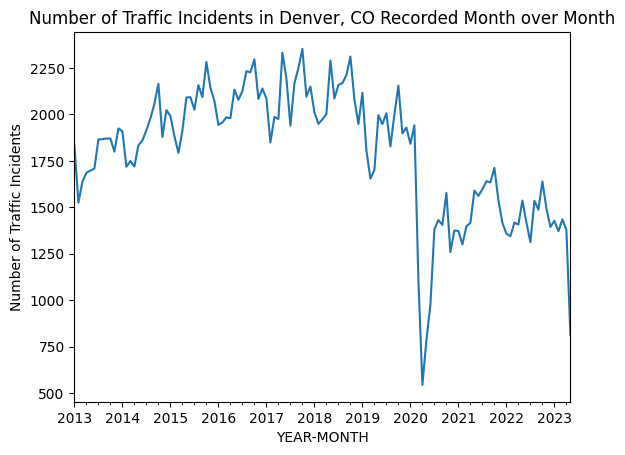

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Will plot by month over time, so create a column for Year-Month
# then pivot on that column, aggregating by size (count)
traffic_data['YEAR-MONTH'] = traffic_data.DATETIME.dt.to_period("M")
pivot = traffic_data.pivot_table(index='YEAR-MONTH', aggfunc='size')

ax = pivot.plot()
plt.ylabel('Number of Traffic Incidents')
plt.title('Number of Traffic Incidents in Denver, CO Recorded Month over Month')
plt.show()

The initial exploratory analysis reveals that the total number of recorded traffic incidents generally appears to be on a downward trend, with 2020 resulting in the fewest number of incidents.  This data set only includes accidents reported to the Denver Police Department, so trends in the data may not definitely represent a change in the number of accidents but rather a change in the number of _reported_ accidents.

The below cells show the total number of fatalities and serious injuries between 2013-2023 as a result of a traffic incident:

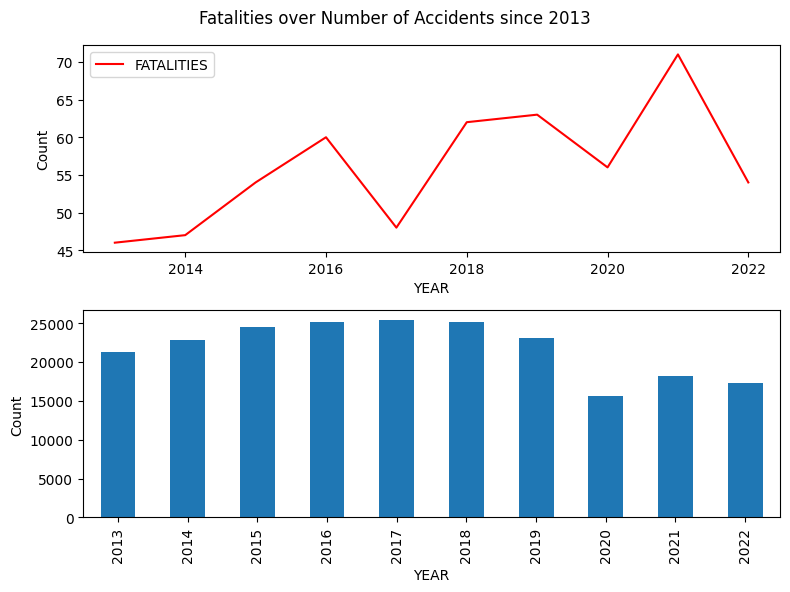

In [88]:
traffic_data['YEAR'] = traffic_data.DATETIME.dt.year
pivot = traffic_data[traffic_data.YEAR < 2023].pivot_table(index='YEAR', values = 'FATALITIES', aggfunc=np.sum)
pivot2 = traffic_data[traffic_data.YEAR < 2023].pivot_table(index='YEAR', aggfunc='size')

fig, ax = plt.subplots(2,1, figsize=(8,6))
pivot.plot(kind='line', color='red', ax=ax[0])
pivot2.plot(kind='bar', ax=ax[1])

ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
fig.suptitle('Fatalities over Number of Accidents since 2013')
plt.show()

Again, it appears that both injuries and fatalities from traffic incidents generally appear to be on a downward trend. However, the number of serious injuries still appears to be significantly higher than fatalities from traffic incidents.  The following calculation shows that the percentage of accidents that are fatal have been slowly increasing.

In [99]:
print("Percentage of accidents that are fatal since 2013")
years = range(2013, 2023)
for item in zip(pivot.values, pivot2, years):
    print(f"{item[2]}: {100 * (item[0][0] / item[1]):0.2f}%")

Percentage of accidents that are fatal since 2013
2013: 0.22%
2014: 0.21%
2015: 0.22%
2016: 0.24%
2017: 0.19%
2018: 0.25%
2019: 0.27%
2020: 0.36%
2021: 0.39%
2022: 0.31%


Looking at the counts of combinations of the vehicle types involved in the accidents, many of the fatal accidents are between a passenger cat and an SUV.  

In [115]:
fatal = traffic_data[traffic_data.FATALITIES > 0]
fatal = fatal[fatal.TU1_VEHICLE_TYPE != 'UNKNOWN']
fatal = fatal[fatal.TU2_VEHICLE_TYPE != 'UNKNOWN']
fatal[['TU1_VEHICLE_TYPE','TU2_VEHICLE_TYPE']].value_counts()[:5]

TU1_VEHICLE_TYPE   TU2_VEHICLE_TYPE 
PASSENGER CAR/VAN  PASSENGER CAR/VAN    49
SUV                PASSENGER CAR/VAN    25
PASSENGER CAR/VAN  SUV                  25
MOTORCYCLE         PASSENGER CAR/VAN    23
                   SUV                  15
Name: count, dtype: int64

Despite traffic accidents decreasing during the pandemic, fatalities seems unchanged

In [116]:
traffic_data[traffic_data.FATALITY_MODE_1 == "PEDESTRIAN"]['TU1_VEHICLE_TYPE'].value_counts()

TU1_VEHICLE_TYPE
UNKNOWN                   64
PASSENGER CAR/VAN         15
SUV                       12
PICKUP TRUCK              10
VEHICLE OVER 10000 LBS     1
MOTOR HOME                 1
Name: count, dtype: int64

Looking closely at incidents resulting in serious injuries:

In [52]:
injured = traffic_data[traffic_data.SERIOUSLY_INJURED > 0]
injured = injured[injured.SERIOUSLY_INJURED_MODE_1 != 'UNKNOWN']  # Drop UNKNOWN values
injured.SERIOUSLY_INJURED_MODE_1.value_counts()

SERIOUSLY_INJURED_MODE_1
PASSENGER CAR/VAN         1829
MOTORCYCLE                 785
SUV                        690
PEDESTRIAN                 506
BICYCLE                    280
PICKUP TRUCK               273
MOTORIZED BICYCLE           27
VEHICLE OVER 10000 LBS      27
BUS                         17
MEDIUM/HEAVY TRUCKS          5
PEDESTERIAN                  3
LIGHT RAIL                   1
MOTOR HOME                   1
LOW SPEED VEHICLE            1
AUTOCYCLE                    1
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Seriously Injured by Mode and Year')

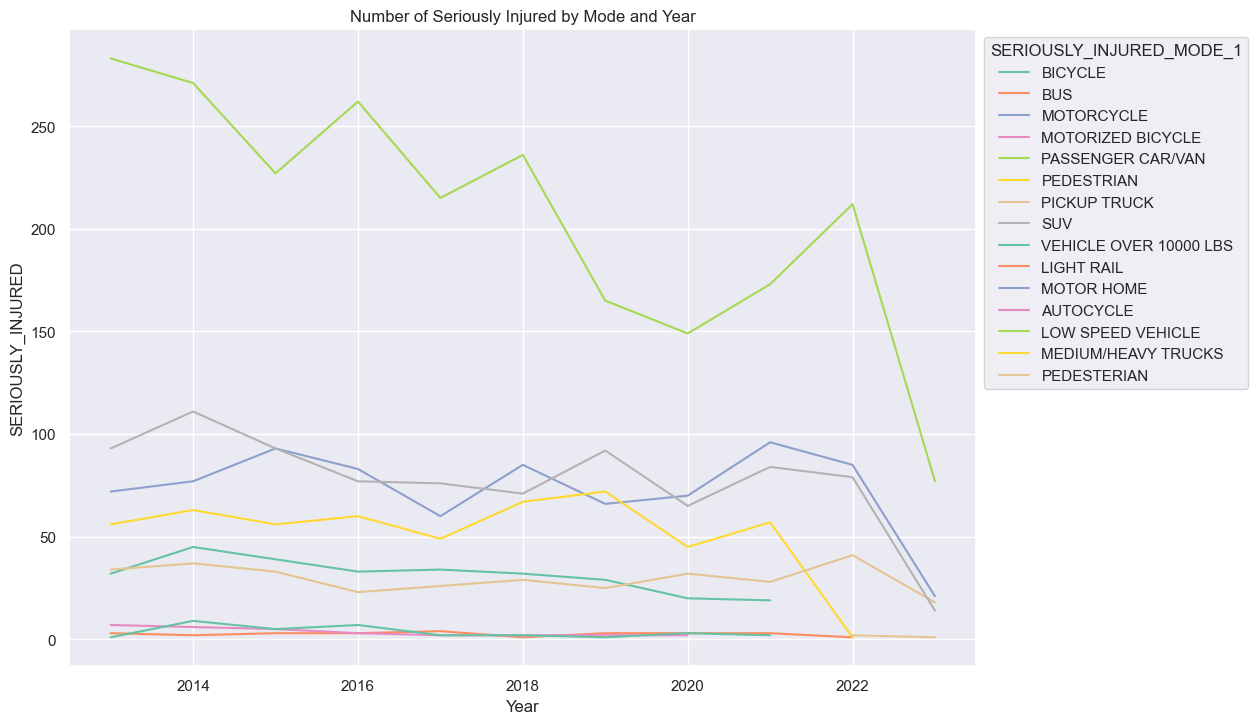

In [53]:
#injured.groupby('SERIOUSLY_INJURED_MODE_1')['SERIOUSLY_INJURED'].sum().plot()

# injured.set_index(injured.Datetime.dt.year, inplace=True)
# injured.groupby('SERIOUSLY_INJURED_MODE_1')['SERIOUSLY_INJURED'].sum().plot(legend=True, xlabel="Year", ylabel="injured")

injured['Year'] = injured.DATETIME.dt.year
injuries_over_time1 = injured.groupby(['Year','SERIOUSLY_INJURED_MODE_1'], as_index=False)['SERIOUSLY_INJURED'].sum()
injuries_over_time1


ax = sns.lineplot(x= 'Year', y='SERIOUSLY_INJURED', hue='SERIOUSLY_INJURED_MODE_1', palette = "Set2", data=injuries_over_time1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Number of Seriously Injured by Mode and Year")


From the plot above, we can see that the majority of the victims who were seriously injured in a traffic incident appeared to have been in passenger cars/vans, followed by motorcycles and suvs, while generally, the overall trend of serious traffic accidents appears to be decreasing. 

Text(0, 0.5, 'Vehicle type')

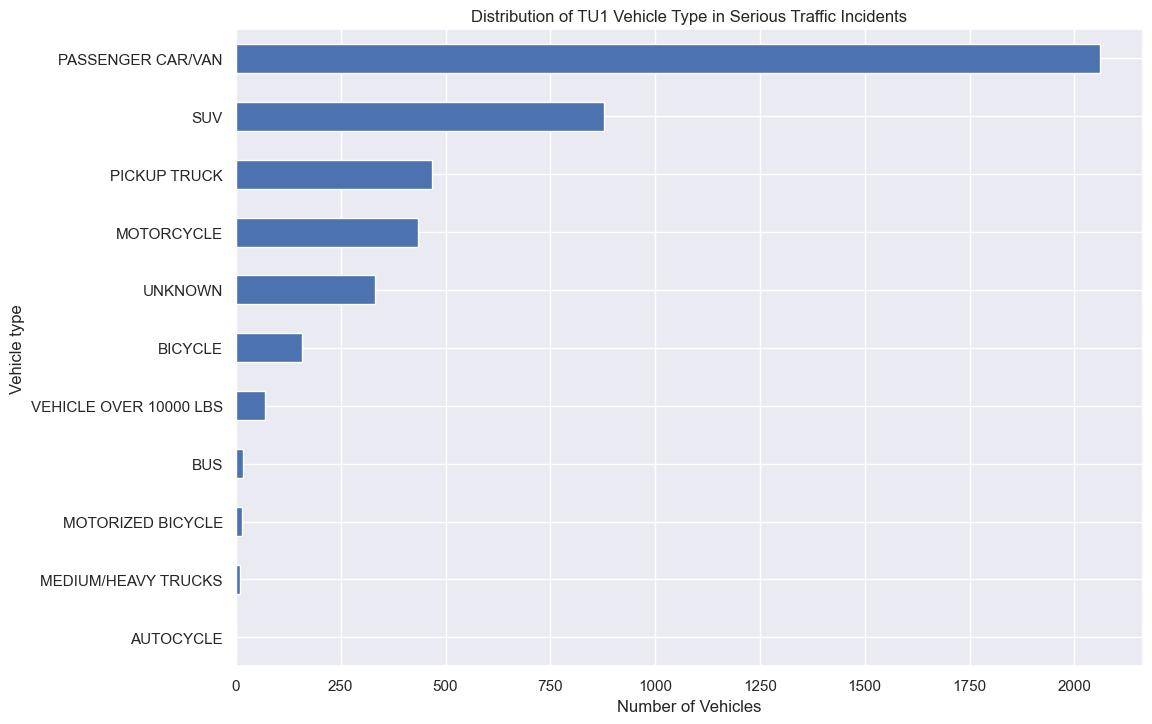

In [54]:
# distribution of injured tu1_vehicle type

injured.TU1_VEHICLE_TYPE.value_counts().sort_values().plot(kind='barh')
plt.title('Distribution of TU1 Vehicle Type in Serious Traffic Incidents')
plt.xlabel('Number of Vehicles')
plt.ylabel('Vehicle type')


From the chart above, we can see that the overwhelming majority of vehicle types causing these incidents are passenger cars/vans, followed by suvs and other vehicle types.

Text(0.5, 1.0, 'Distribution of Incidents Causing Injuries with Vehicle Types from 2013-2023')

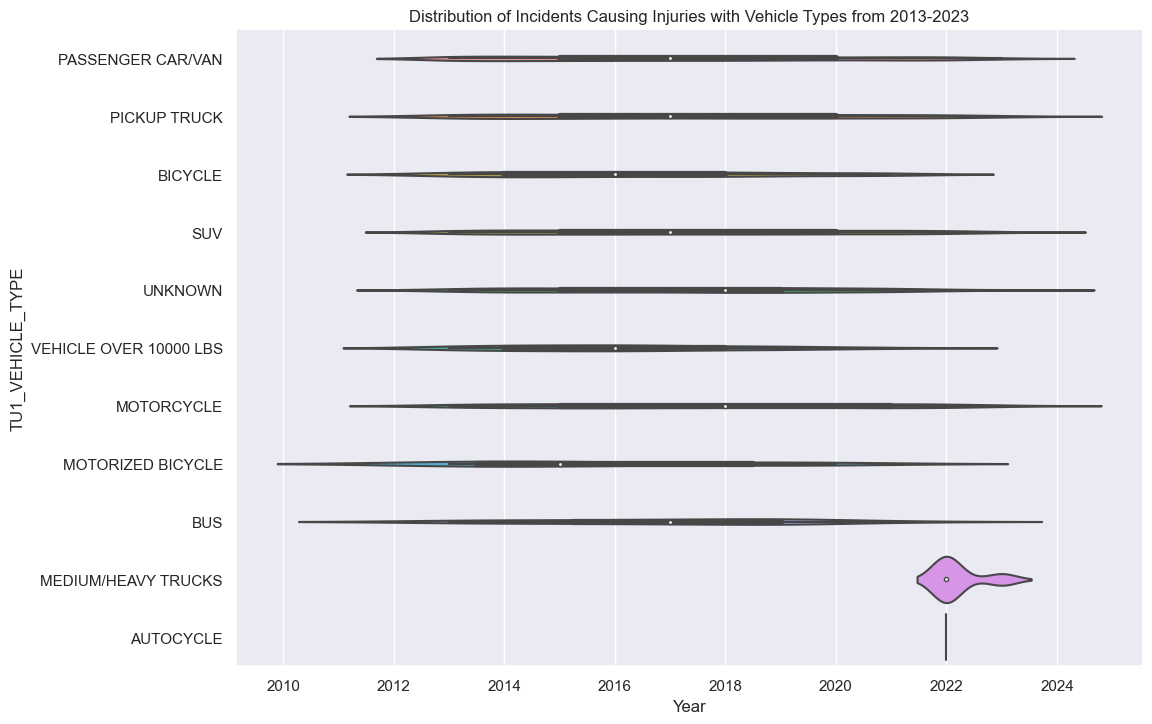

In [55]:
sns.violinplot(y = 'TU1_VEHICLE_TYPE', x = 'Year', data = injured)
plt.title("Distribution of Incidents Causing Injuries with Vehicle Types from 2013-2023")

The violin plot above shows the distribution of the different vehicle types that caused serious injuries across the years. It appears that the frequency of accidents across all vehicle categories remained approximately even across all years shown in the chart, with most incidents tapering off in recent years. Accidents caused by 'other' vehicle types appears to have slightly increased in frequency from 2018 and above, while most other categories appear to show a decrease in frequency from 2020 onwards.

### Part V. Conclusion



According to the data set, injuries are on a downward trend, while fatalities are slightly increasing for traffic accidents in Denver.  The percentage of accidents that result in a fatility is still low, less than 1%, but this percentage has been slowly increasing over the past decade - it's currently unclear why this may be or if this increase is statistically significant.   Unsurprisingly, injuries are most frequently caused and sustained in passenger cars/vans. This can be attributed to the fact that most people in the population drive passenger vehicles as opposed to other types modes of transportation. Thus it appears that incidents of passenger cars - passenger cars are the most common types of vehicle incidents resulting in a fatality or serious injury, with passenger cars being the most frequent mode of transportation to both be injured and the driver at fault. Following passenger vehicles, motorcycles and SUVs are the mode of transportation in which drivers appear to be injured frequently.

Some time periods to note include 2020, in which the global pandemic can be attributed to the sharp downward spike in overall vehicle incidents. With fewer drivers on the road, it is unsurprising that there are fewer traffic incidents recorded overall. Following 2020, traffic accidents increased, but not to the same pre-pandemic levels.

There appeared to be no notable outliers in this particular dataset over the time period that was analyzed. This is likely because of the overall size of the dataset (~220k rows). From a yearly view, any outliers would likely not affect the general analysis of the data, and thus we can reasonably conclude that our observations are fairly accurate.